In [1]:
from timecave.data_generation import time_series_functions as tsf
from timecave.data_generation import time_series_generation as tsg
from timecave.data_generation import _utils as dgu
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [2]:
def create_df_from_array(arr):
    df = pd.DataFrame(np.array(arr).T)
    df.reset_index(drop=False, names=["Timestep"])
    return df

In [3]:
samples = 200

In [4]:
s1_parameters = {
    'lags': 3,
    'max_root': 1.2,
    'ar': True,
    'ma': False,
    }

s2_parameters = {
    'lags': 1,
    'max_root': 1.2,
    'ar': False,
    'ma': True,
    }


In [5]:
g1 = tsg.TimeSeriesGenerator(
    length = samples,
    noise_level=0.2,
    functions = [tsf.arma_ts], 
    parameter_values = [s1_parameters]
    )
arr1 = g1.generate(1000, og_seed=1)

In [6]:
g2 = tsg.TimeSeriesGenerator(
    length = samples,
    noise_level=0.2,
    functions = [tsf.arma_ts], 
    parameter_values = [s2_parameters]
    )
arr2 = g2.generate(1000, og_seed=1)

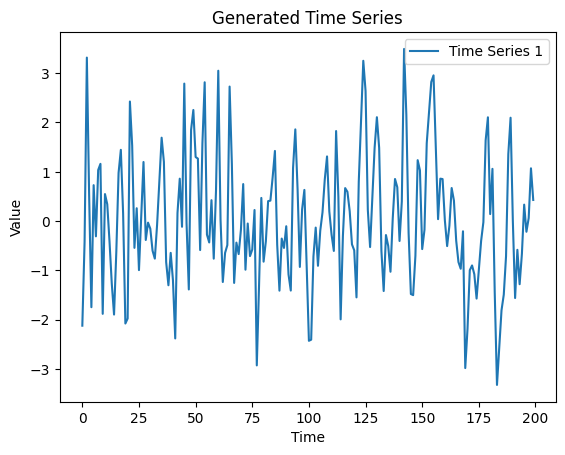

In [7]:
g2.plot(1)

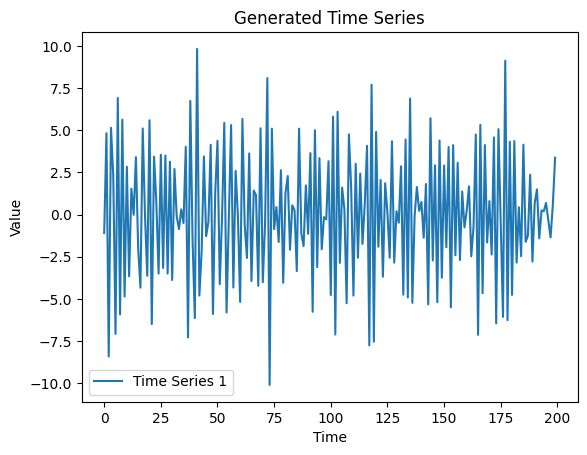

In [8]:
g1.plot(1)

In [9]:
df1 = create_df_from_array(arr1)
#df1.to_csv('datasets/synthetic_data/s1.csv', index=False)

In [10]:
df1

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-1.205685,-1.091857,0.822694,-0.667179,-1.028699,-1.849631,-0.621065,-0.578400,0.570482,-0.272839,...,-0.905550,-0.766152,2.480766,-0.311036,2.697987,-0.280932,-0.060251,0.806362,0.895549,-1.689397
1,-2.204091,4.827625,-1.002332,-0.330750,-1.194481,2.032147,-0.565297,2.470857,0.829496,-0.447334,...,0.252447,0.016090,-4.559180,0.758527,-8.805078,-0.986574,-0.507299,2.678308,-1.488503,-5.950218
2,-1.645260,-8.420980,-1.633756,1.642029,1.941426,0.385684,2.080998,-1.485972,-0.180904,0.362236,...,2.076713,2.006987,2.300903,1.339780,10.911331,0.699200,-0.317429,0.923461,-0.043218,-5.788029
3,-1.353980,5.152921,4.444904,1.169186,2.209896,-1.696775,-1.373859,0.060772,-2.066288,-1.292081,...,0.737667,0.517059,-0.226371,-2.176826,-4.866592,2.279272,-1.647368,-2.143884,2.877543,-0.112473
4,0.259900,2.309678,-3.720119,-1.405647,-1.355197,2.272746,-1.511459,-1.113332,1.605728,1.638614,...,-1.182305,-1.430676,2.057770,0.101581,0.515221,-1.449751,-0.128229,-1.068170,-3.247501,3.314518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.387122,0.691066,-2.076013,1.485493,0.657235,-1.334659,0.980807,-0.110724,-0.370025,0.429541,...,1.770749,3.737166,-1.130819,1.369130,-1.911312,0.425378,2.293839,-1.387547,-7.466609,2.988182
196,-1.039426,-0.325973,2.067490,0.007917,1.713231,0.956058,-0.844369,-0.564971,1.637559,-2.152281,...,1.277968,2.752912,3.879933,1.675851,3.002493,2.288809,-1.771156,-1.175658,7.147899,-0.924607
197,0.862305,-1.357458,-1.776686,-1.703374,-0.017744,1.252766,-0.605515,-0.441942,0.041918,0.156661,...,0.870131,-4.354902,-3.237016,-1.219265,-3.157858,-0.529926,-2.467551,0.099983,-5.791181,0.760018
198,0.771277,0.583374,2.536893,-0.409563,-0.414471,-1.406327,-0.891969,2.527401,0.970232,1.878508,...,-0.365779,-3.907279,0.647823,1.081166,-1.299340,-2.229591,3.134988,0.008136,2.836313,5.550348


In [11]:
df2 = create_df_from_array(arr2)
#df2.to_csv('datasets/synthetic_data/s2.csv', index=False)
df2

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.884540,-2.121789,1.213724,0.528670,-0.868163,-0.331902,-0.165012,-0.467771,0.735366,1.066339,...,-0.716456,-1.470841,0.437006,-0.785844,0.288710,-0.899244,-2.989437,1.190387,-1.039842,-1.288011
1,-1.503983,-0.420467,1.151736,-1.046058,0.082977,0.149862,-3.354819,-2.349301,0.787605,2.443727,...,-1.098676,-0.147248,-0.633491,-0.202067,-1.155211,-0.032035,2.570473,-1.042767,-3.005482,2.085312
2,1.444659,3.316615,0.538656,-0.474619,1.362789,0.208861,-3.768761,0.988977,-0.743363,1.775472,...,-0.029491,-0.328211,-1.153090,1.284933,-1.515076,1.247979,-1.190411,0.160730,-3.444768,-1.260710
3,0.444921,0.540689,1.153386,0.143945,-0.268351,0.317524,-0.838083,1.936421,0.113987,-0.061532,...,2.506478,0.960621,-1.033981,1.403142,-1.181689,-1.092814,2.875381,-0.305930,-0.522063,1.407188
4,-2.251007,-1.746876,1.468992,-1.067534,-1.211021,-0.506970,-0.260223,1.366279,0.338355,0.068082,...,0.539522,-0.709487,-0.986616,0.285908,-2.556212,-0.343739,0.504838,2.412267,-0.023836,1.391486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.343322,0.333726,-2.033699,-0.869020,-0.281294,0.507118,1.510352,-1.702376,1.171934,-0.477324,...,1.382175,0.840087,2.353770,0.978355,0.514399,-1.935481,0.567753,1.123854,1.487026,0.245655
196,0.796525,-0.216181,1.069176,0.582300,-0.594160,0.928818,0.501124,-0.566514,-0.809718,-2.309096,...,0.979832,-1.432345,0.239605,-0.500418,0.880142,-0.067273,-0.267165,0.199138,0.518201,-1.028620
197,-0.988268,0.061681,3.005735,-0.809249,2.221807,-0.402742,-1.842393,1.540375,-0.184540,-0.631777,...,0.562300,1.755469,0.103797,-1.525731,-0.340990,-0.268812,-0.403400,1.022156,0.277213,0.383992
198,-0.250951,1.070727,0.557957,0.110784,-1.859763,-0.950679,-0.460460,2.441340,0.536173,0.634576,...,-0.845163,-0.333638,-1.576022,-0.216499,-0.813218,0.410802,-0.452067,-0.374574,1.618091,0.723408


In [12]:
length=200
seed=2

#Data
data = pd.read_csv('datasets/other/accidental-deaths-in-usa-monthly.csv', usecols=[1], names = ['accidental_deaths'], skiprows=1)
ts = data.accidental_deaths.to_numpy()

In [13]:
def simulate_from_data(number_samples:int, ts: np.array=200, seed: int=None):
    sar = SARIMAX(ts, order=(1, 0, 0), seasonal_order = (0, 0, 0, 12))
    sar_fit = sar.fit()

    ts_sar = sar_fit.simulate(number_samples, random_state=seed)

    return{'ts':ts_sar, 'model': sar_fit}

#Simulation
results =  simulate_from_data(200, ts, seed=None)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04717D+00    |proj g|=  8.31045D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      3      1     0     0   2.608D-06   8.047D+00
  F =   8.0471500606223447     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [14]:
s3_parameters = {
    }

g3 = tsg.TimeSeriesGenerator(
    length = samples,
    noise_level=0.1,
    functions = [simulate_from_data], 
    parameter_values = [s3_parameters]
    )



arr3 = g3.generate(1000, og_seed=1)

ValueError: 'param_possibilities' must be a non-empty dictionary

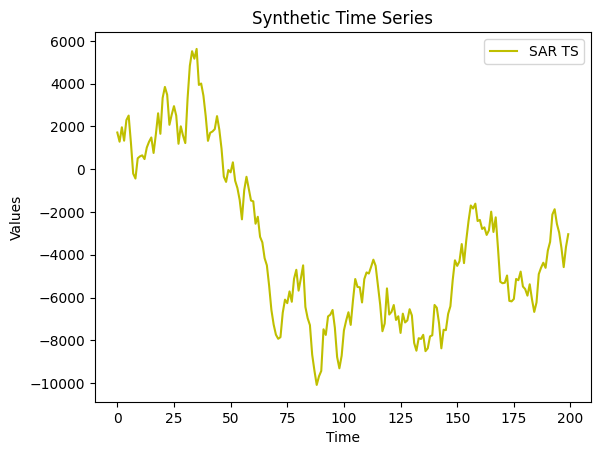

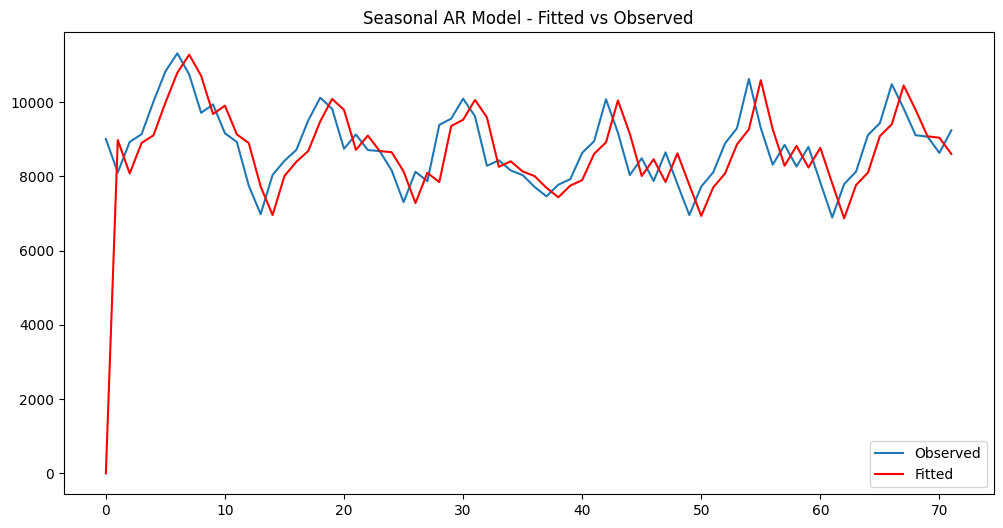

In [ ]:
ts_sar = results['ts']

#Plots
model = 'sarusa'

plt.plot(ts_sar, c='y', label ='SAR TS')
plt.title('Synthetic Time Series')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(data.index, data['accidental_deaths'], label='Observed')
plt.plot(data.index, results['model'].fittedvalues, label='Fitted', color='red')
plt.title('Seasonal AR Model - Fitted vs Observed')
plt.legend()
plt.show()

